CHE 116 Project
====

## Sci-Kit Learn

*Making a Classifier Using Machine Learning*

----

#### Robert Cecil, April 2018

Goals:
---

1. Understand the basics that go into a classifier.
2. Learn how to import data, visualize it roughly though an interactive 3D graph, and preapre it for training. 
3. Properly train the algorithim and test it against known values.
4. Visualize the classifier that we made. 

Our classifier will allow us to figure out whether a cancer is benign or malignant based simply on measurements. 

What is Statistical Classification?
====

What is statisical classfication and why is it important for machine learning? The concept invloves taking data for which we know all values and finding relationships, using Bayesian group membership probablilites, amonf other methods, for example. We can use an algorithim that can take these known values and apply the math and analysis to it to then give us a result which we can define. 

Importing Our Data
====

I've decided to use one of the built in data sets from Sci-Kit Learn. We will be using a dataset on breast cancer. Below is code for presenting the raw data and measurements. 

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print (cancer.feature_names) #
print (cancer.target_names)
print (cancer.data[0])
print (cancer.target[0])
for i in range(len(cancer.target)):
    print ("Example %d: label %s, features %s" % (i, cancer.target[i], cancer.data[i]))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
0
Example 0: label 0, features [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.4

Example 279: label 1, features [1.385e+01 1.518e+01 8.899e+01 5.874e+02 9.516e-02 7.688e-02 4.479e-02
 3.711e-02 2.110e-01 5.853e-02 2.479e-01 9.195e-01 1.830e+00 1.941e+01
 4.235e-03 1.541e-02 1.457e-02 1.043e-02 1.528e-02 1.593e-03 1.498e+01
 2.174e+01 9.837e+01 6.700e+02 1.185e-01 1.724e-01 1.456e-01 9.993e-02
 2.955e-01 6.912e-02]
Example 280: label 0, features [1.916e+01 2.660e+01 1.262e+02 1.138e+03 1.020e-01 1.453e-01 1.921e-01
 9.664e-02 1.902e-01 6.220e-02 6.361e-01 1.001e+00 4.321e+00 6.965e+01
 7.392e-03 2.449e-02 3.988e-02 1.293e-02 1.435e-02 3.446e-03 2.372e+01
 3.590e+01 1.598e+02 1.724e+03 1.782e-01 3.841e-01 5.754e-01 1.872e-01
 3.258e-01 9.720e-02]
Example 281: label 1, features [1.174e+01 1.402e+01 7.424e+01 4.273e+02 7.813e-02 4.340e-02 2.245e-02
 2.763e-02 2.101e-01 6.113e-02 5.619e-01 1.268e+00 3.717e+00 3.783e+01
 8.034e-03 1.442e-02 1.514e-02 1.846e-02 2.921e-02 2.005e-03 1.331e+01
 1.826e+01 8.470e+01 5.337e+02 1.036e-01 8.500e-02 6.735e-02 8.290e-02
 3.101e-01 

Example 553: label 1, features [9.333e+00 2.194e+01 5.901e+01 2.640e+02 9.240e-02 5.605e-02 3.996e-02
 1.282e-02 1.692e-01 6.576e-02 3.013e-01 1.879e+00 2.121e+00 1.786e+01
 1.094e-02 1.834e-02 3.996e-02 1.282e-02 3.759e-02 4.623e-03 9.845e+00
 2.505e+01 6.286e+01 2.958e+02 1.103e-01 8.298e-02 7.993e-02 2.564e-02
 2.435e-01 7.393e-02]
Example 554: label 1, features [1.288e+01 2.892e+01 8.250e+01 5.143e+02 8.123e-02 5.824e-02 6.195e-02
 2.343e-02 1.566e-01 5.708e-02 2.116e-01 1.360e+00 1.502e+00 1.683e+01
 8.412e-03 2.153e-02 3.898e-02 7.620e-03 1.695e-02 2.801e-03 1.389e+01
 3.574e+01 8.884e+01 5.957e+02 1.227e-01 1.620e-01 2.439e-01 6.493e-02
 2.372e-01 7.242e-02]
Example 555: label 1, features [1.029e+01 2.761e+01 6.567e+01 3.214e+02 9.030e-02 7.658e-02 5.999e-02
 2.738e-02 1.593e-01 6.127e-02 2.199e-01 2.239e+00 1.437e+00 1.446e+01
 1.205e-02 2.736e-02 4.804e-02 1.721e-02 1.843e-02 4.938e-03 1.084e+01
 3.491e+01 6.957e+01 3.576e+02 1.384e-01 1.710e-01 2.000e-01 9.127e-02
 2.226e-01 

Now we're going to install a pip package for a module we want to use in the current Jupyter kernel.
It interacts with the system to create a new terminal outside of the notebook, which then installs the module. 
'--upgrade pip' allows for the latest version of the import to be installed. 

In [2]:
import sys
!{sys.executable} -m pip install --upgrade pip plotly

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (10.0.1)
Requirement already up-to-date: plotly in /opt/conda/lib/python3.6/site-packages (2.5.1)
Requirement not upgraded as not directly required: requests in /opt/conda/lib/python3.6/site-packages (from plotly) (2.18.4)
Requirement not upgraded as not directly required: six in /opt/conda/lib/python3.6/site-packages (from plotly) (1.11.0)
Requirement not upgraded as not directly required: decorator>=4.0.6 in /opt/conda/lib/python3.6/site-packages (from plotly) (4.2.1)
Requirement not upgraded as not directly required: nbformat>=4.2 in /opt/conda/lib/python3.6/site-packages (from plotly) (4.4.0)
Requirement not upgraded as not directly required: pytz in /opt/conda/lib/python3.6/site-packages (from plotly) (2018.3)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/lib/python3.6/site-packages (from requests->plotly) (3.0.4)
Requirement not upgraded as not directly required:

Roughly Visualizing Our Data
====

Now we're going to use "pandas" and "plotly" to visually represent our raw data in an interactive way. We will also continue to utilzize "numpy" and "Sci-Kit Learn" to manipulate out data so we can represent the over 30 different measurement types in only three dimensions. 

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly
import plotly.graph_objs as go
 
%matplotlib inline

# Connect notebook and download JS files.
plotly.offline.init_notebook_mode(connected=True)

In [4]:
# Prepare the data we've already imported.
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

'''Pre-process data. This is basically a process to standardize and scale the data so it can 
be more easiy manipulated and compare different measurement types.'''
scaler = StandardScaler()
scaler.fit(df)
preprocessed_data = scaler.transform(df)

'''Decompose data (PCA). A statisical method, prinipal compenent analysis, is used to reduce 
the data so that it can more easily be represented. We will also lose some variance, however this 
will not affect the classifier we make later on''' 
pca = PCA(n_components=3)
pca.fit(preprocessed_data)
decomposed_data = pca.transform(preprocessed_data)

# Add malignant column.
decomposed_df = pd.DataFrame(decomposed_data, columns=['x', 'y', 'z'])
decomposed_df['malignant'] = 1 - cancer.target
 
# Create individual data sets.
malignant = decomposed_df[decomposed_df.malignant == 1]
benign = decomposed_df[decomposed_df.malignant == 0]

In [5]:
# Make graph lines black, with a small amount of alpha compositing.
line_style = dict(color='rgba(0, 0, 0, 0.14)',width=0.5)
 
# Create scatters.
malignant_scatter = go.Scatter3d(
    x=malignant['x'],
    y=malignant['y'],
    z=malignant['z'],
    mode='markers',
    marker=dict(
        color='rgb(244, 209, 56)',
        size=10,
        opacity=0.8,
        line=line_style
    ),
    name='Malignant'
)
benign_scatter = go.Scatter3d(
    x=benign['x'],
    y=benign['y'],
    z=benign['z'],
    mode='markers',
    marker=dict(
        color='rgb(122, 244, 56)',
        size=10,
        opacity=0.8,
        line=line_style
    ),
    name='Benign'
)
 
# Create data array. Ensure malignant scatter is rendered above).
data = [benign_scatter, malignant_scatter]
 
# Create layout.
layout = go.Layout(title = 'Breast Cancer', showlegend=True, margin=dict(l=0,r=0,b=0,t=0))

Below is our interactive graph... feel free to, um, interact... grab and turn it, zoom in and out,
it's quite fun. 

(Please note, this isn't for the color plot extra credit, this is for the interactive/animation extra credit, to which wasn't technically ruled out in that specific criterion. It was a cool way to demonstrate the power of Sci Kit and intereactive ability of Plotly.)

In [6]:
# Render the interactive graph
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

Now we have a light feel of what the data looks like, we'll continue preparing the data for our classifier. Below, we're just importing all the data and marking indices for leaving out some data to use for testing after we train the algorithm. 

In [7]:
import numpy as np
from sklearn import tree

cancer = load_breast_cancer() 
test_idx = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550] # here, we're marking off random data points

Below, we are preparing both our training data (data used to make the classifier) and our testing data (data not included in the classifier with values of classification taken away).  

In [8]:
#training data
train_target = np.delete(cancer.target, test_idx) # removing feature names of test data (malignant, benign)
train_data = np.delete(cancer.data, test_idx, axis=0) # removing test data from train data

#testing data
test_target = cancer.target[test_idx] #setting aside names 
test_data = cancer.data[test_idx]

Below is where we finally begin to train the data. 

In [9]:
clf = tree.DecisionTreeClassifier() # shorter typing in longer run
clf.fit(train_data, train_target) # fits data to a tree classifier,

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Now, for the moment of truth, we will print the result of the test data and compare it to the result given by our classfier. '0' is malignant tumor, '1' is a benign tumor. 

In [10]:
print (test_target) 
print (clf.predict(test_data))

[0 1 0 1 1 0 0 1 0 1 1 1]
[0 1 0 1 1 0 0 1 0 1 1 1]


# It worked perfectly!

Visualizing Our Classifier
====

Now we're going to install a pip package for a module we want to use in the current Jupyter kernel.
It interacts with the system to create a new terminal outside of the notebook, which then installs the module. 
'--upgrade pip' allows for the latest version of the import to be installed. 

In [11]:
import sys
!{sys.executable} -m pip install --upgrade pip graphviz

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (10.0.1)
Requirement already up-to-date: graphviz in /opt/conda/lib/python3.6/site-packages (0.8.3)


Now we're going to use 'graphviz'. Below is code that displays the tree inside the notebook. This will allow us to see in a neat format how the classifier makes its decisions.

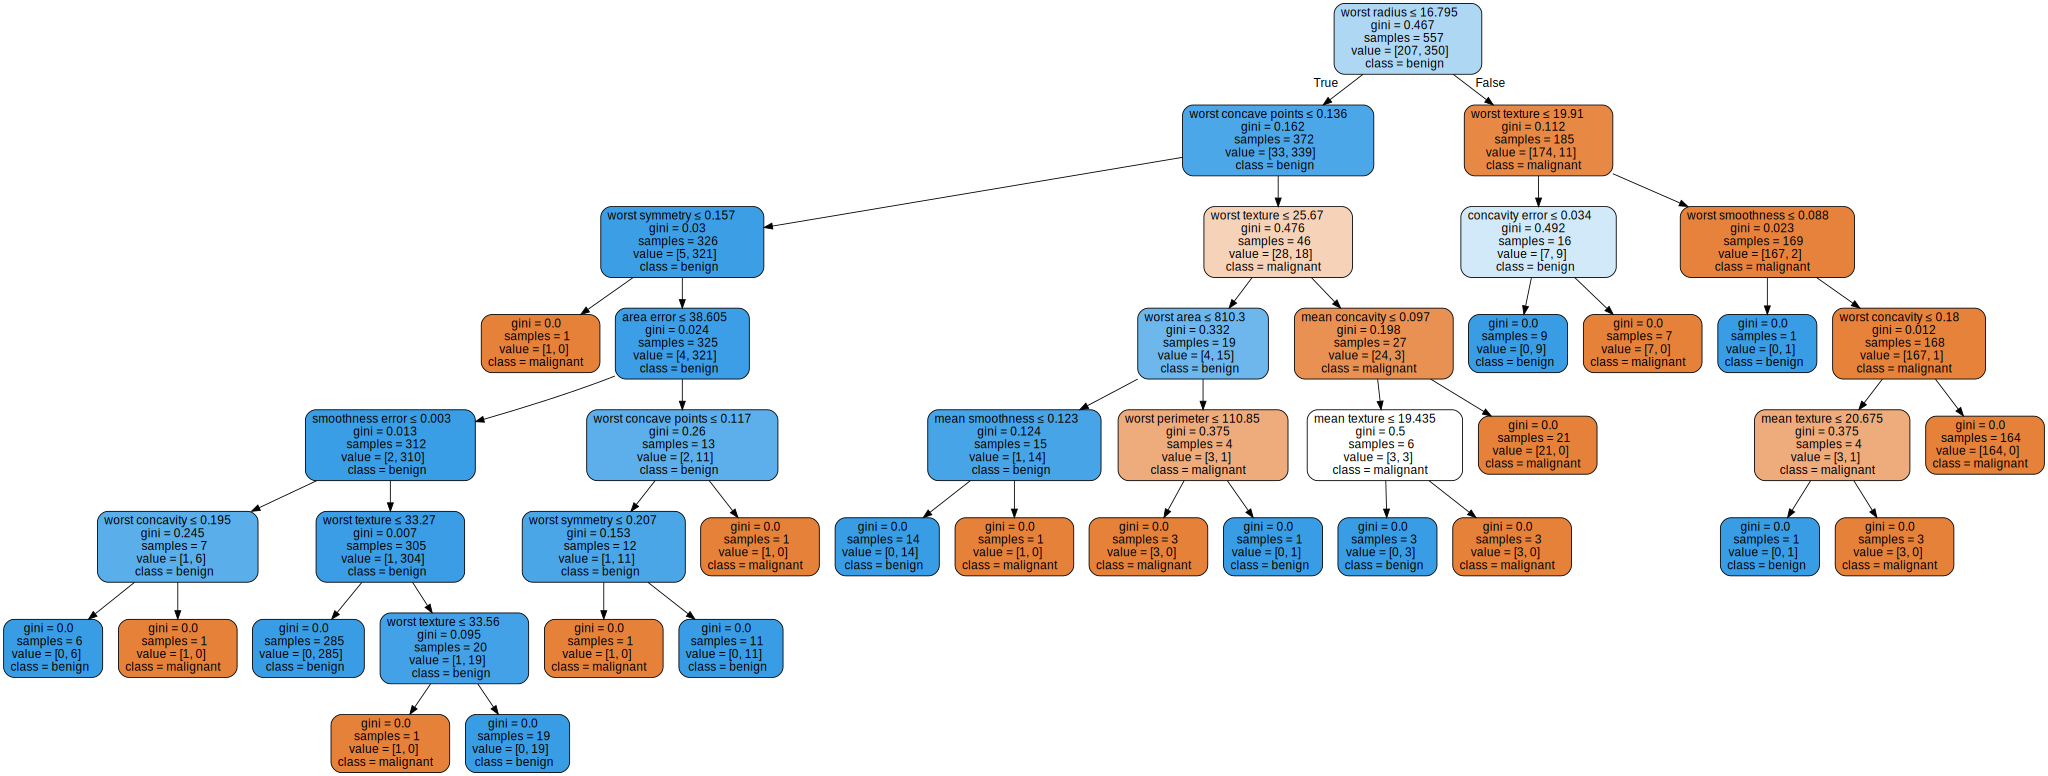

In [12]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                    feature_names=cancer.feature_names,  
                    class_names=cancer.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Sources:


Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. (Scholarly)
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Gordan, J. Visualizing a Decision Tree - Machine Learning Recipes #2,Google Developers
https://www.youtube.com/watch?v=tNa99PG8hR8

Jager, S. Visualizing Breast Cancer Wisconsin (Diagnostic) Data Set
http://simonjaeger.com/visualizing-breast-cancer-wisconsin-diagnostic-data-set/

Statistical classification, Wikipedia
https://en.wikipedia.org/wiki/Statistical_classification
